# Importações

In [1]:
import io
import zipfile
import requests
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 1. Consumindo bases

In [6]:
url_sensor_2012_2015 = "https://github.com/AILAB-CEFET-RJ/qualiar/raw/main/NEW_TEST/Data/SUS/Por_Ano/Internacoes_Doenca_Resp_2012_2015.zip"
url_sensor_2016_2018 = "https://github.com/AILAB-CEFET-RJ/qualiar/raw/main/NEW_TEST/Data/SUS/Por_Ano/Internacoes_Doenca_Resp_2016_2018.zip"
url_sensor_2019_2021 = "https://github.com/AILAB-CEFET-RJ/qualiar/raw/main/NEW_TEST/Data/SUS/Por_Ano/Internacoes_Doenca_Resp_2019_2021.zip"
url_sensor_2022_2024 = "https://github.com/AILAB-CEFET-RJ/qualiar/raw/main/NEW_TEST/Data/SUS/Por_Ano/Internacoes_Doenca_Resp_2022_2024.zip"

def baixar_e_ler_zip(url, pasta):
  response = requests.get(url)
  response.raise_for_status()
  zip_file = zipfile.ZipFile(io.BytesIO(response.content))
  dfs = {}
  for name in zip_file.namelist():
    if name.endswith('.csv'):
      with zip_file.open(name) as f:
        dfs[name] = pd.read_csv(f)
  return dfs

# 2012-2015
dfs_2012_2015 = baixar_e_ler_zip(url_sensor_2012_2015, 'Internacoes_Doenca_Resp_2012_2015')
df_sus_2012 = dfs_2012_2015['Internacoes_Doenca_Resp_2012_2015/dados_filtrados_2012.csv']
df_sus_2013 = dfs_2012_2015['Internacoes_Doenca_Resp_2012_2015/dados_filtrados_2013.csv']
df_sus_2014 = dfs_2012_2015['Internacoes_Doenca_Resp_2012_2015/dados_filtrados_2014.csv']
df_sus_2015 = dfs_2012_2015['Internacoes_Doenca_Resp_2012_2015/dados_filtrados_2015.csv']

# 2016-2018
dfs_2016_2018 = baixar_e_ler_zip(url_sensor_2016_2018, 'Internacoes_Doenca_Resp_2016_2018')
df_sus_2016 = dfs_2016_2018['Internacoes_Doenca_Resp_2016_2018/dados_filtrados_2016.csv']
df_sus_2017 = dfs_2016_2018['Internacoes_Doenca_Resp_2016_2018/dados_filtrados_2017.csv']
df_sus_2018 = dfs_2016_2018['Internacoes_Doenca_Resp_2016_2018/dados_filtrados_2018.csv']

# 2019-2021
dfs_2019_2021 = baixar_e_ler_zip(url_sensor_2019_2021, 'Internacoes_Doenca_Resp_2019_2021')
df_sus_2019 = dfs_2019_2021['Internacoes_Doenca_Resp_2019_2021/dados_filtrados_2019.csv']
df_sus_2020 = dfs_2019_2021['Internacoes_Doenca_Resp_2019_2021/dados_filtrados_2020.csv']
df_sus_2021 = dfs_2019_2021['Internacoes_Doenca_Resp_2019_2021/dados_filtrados_2021.csv']

# 2022-2024
dfs_2022_2024 = baixar_e_ler_zip(url_sensor_2022_2024, 'Internacoes_Doenca_Resp_2022_2024')
df_sus_2022 = dfs_2022_2024['Internacoes_Doenca_Resp_2022_2024/dados_filtrados_2022.csv']
df_sus_2023 = dfs_2022_2024['Internacoes_Doenca_Resp_2022_2024/dados_filtrados_2023.csv']
df_sus_2024 = dfs_2022_2024['Internacoes_Doenca_Resp_2022_2024/dados_filtrados_2024.csv']

C:\Users\jhter\AppData\Local\Temp\ipykernel_37380\312740304.py:14: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f)
C:\Users\jhter\AppData\Local\Temp\ipykernel_37380\312740304.py:14: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f)
C:\Users\jhter\AppData\Local\Temp\ipykernel_37380\312740304.py:14: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f)
C:\Users\jhter\AppData\Local\Temp\ipykernel_37380\312740304.py:14: DtypeWarning: Columns (41,77,78,87,88,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(f)
C:\Users\jhter\AppData\Local\Temp\ipykernel_37380\312740304.py:14: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.

In [7]:
df_sus = pd.concat([df_sus_2012, df_sus_2013, df_sus_2014, df_sus_2015, df_sus_2016, df_sus_2017, df_sus_2018, df_sus_2019, df_sus_2020, df_sus_2021, df_sus_2022, df_sus_2023, df_sus_2024])

df_sus.reset_index(drop=True, inplace=True)

df_sus.shape

(2536110, 113)

In [8]:
df_sus['DIAG_PRINC'].unique()

array(['J960', 'J938', 'J128', 'J189', 'J81 ', 'J353', 'J449', 'J188',
       'J930', 'J942', 'J46 ', 'J459', 'J450', 'J210', 'J40 ', 'J068',
       'J181', 'J219', 'J439', 'J448', 'J438', 'J458', 'J158', 'J039',
       'J129', 'J159', 'J030', 'J931', 'J040', 'J168', 'J969', 'J180',
       'J100', 'J352', 'J152', 'J110', 'J155', 'J440', 'J218', 'J841',
       'J350', 'J952', 'J122', 'J441', 'J989', 'J042', 'J80 ', 'J418',
       'J90 ', 'J853', 'J178', 'J019', 'J060', 'J47 ', 'J984', 'J322',
       'J359', 'J390', 'J351', 'J328', 'J36 ', 'J849', 'J156', 'J343',
       'J358', 'J949', 'J852', 'J381', 'J342', 'J42 ', 'J91 ', 'J370',
       'J157', 'J348', 'J948', 'J13 ', 'J451', 'J840', 'J410', 'J330',
       'J069', 'J958', 'J399', 'J323', 'J628', 'J955', 'J150', 'J411',
       'J985', 'J869', 'J170', 'J959', 'J690', 'J961', 'J151', 'J940',
       'J154', 'J860', 'J951', 'J321', 'J320', 'J983', 'J980', 'J018',
       'J431', 'J121', 'J329', 'J848', 'J339', 'J172', 'J950', 'J851',
      

In [9]:
#@title Selecionando as colunas mais relevantes
interest_columns = ['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'MUNIC_RES', 'NASC', 'SEXO', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM', 'MORTE']

df_sus = df_sus[interest_columns]

In [10]:
# Etapa 1: Lista de prefixos CID-10 que têm relação com poluição atmosférica
cids_relacionados = [
    # Infecções agudas vias aéreas superiores
    'J00', 'J01', 'J02', 'J03', 'J04', 'J05', 'J06',

    # Influenza e pneumonias
    'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18',

    # Infecções vias inferiores - Bronquites
    'J20', 'J21', 'J22',

    # Rinites e sinusites crônicas
    'J30', 'J31', 'J32',

    # Laringite crônica
    'J37',

    # Doenças pulmonares obstrutivas
    'J40', 'J41', 'J42', 'J43', 'J44',

    # Asma e estado de mal asmático
    'J45', 'J46',

    # Bronquiectasia
    'J47',

    # Pneumoconioses e doenças por poeiras
    'J60', 'J61', 'J62', 'J63', 'J64', 'J65',

    # Poeiras orgânicas
    'J66', 'J67',

    # Gases, vapores, fumaças, agentes químicos
    'J68',

    # Pneumonite por aspiração
    'J69',

    # Outras doenças por agentes externos
    'J70',

    # Insuficiência respiratória
    'J96'
]

# CIDs fortemente associados a poluentes atmosféricos
cids_forte_associacao_fortemente = [
    # Pneumonias e broncopneumonias comuns
    'J12', 'J13', 'J14', 'J15', 'J18',

    # Bronquite aguda e crônica
    'J20', 'J40', 'J41', 'J42',

    # DPOC e enfisema
    'J43', 'J44',

    # Asma e crises asmáticas
    'J45', 'J46',

    # Bronquiolite (principalmente em crianças)
    'J21',

    # Rinite alérgica e vasomotora (sazonal, reativa a irritantes)
    'J30',

    # Doenças respiratórias por poeiras, produtos químicos e gases tóxicos
    'J60', 'J61', 'J62', 'J63', 'J64', 'J65',  # pneumoconioses
    'J66', 'J67',  # poeiras orgânicas
    'J68',         # gases, vapores, fumaças

    # Síndrome do desconforto respiratório agudo
    'J80',

    # Insuficiência respiratória aguda ou crônica
    'J96'
]

cids_artigo_relacionados_a_poluentes = [
    'J12', 'J17', 'J18',  # Pneumonias virais, bacterianas e não especificadas
    'J20', 'J22',                             # Bronquites e bronquiolites
    'J30', 'J32'                                          # Rinites
    'J42', 'J43', 'J44',               # Bronquite não especificada, simples, mucopurulenta, enfisema e DPOC
    'J45', 'J46',                                    # Asma e estado de mal asmático
    'J63', 'J64',        # Pneumoconioses por diferentes poeiras inorgânicas
    'J66', 'J67',                                    # Pneumopatias por poeiras orgânicas
    'J68',                                           # Doenças respiratórias por gases, vapores, fumaças
    'J80',                                           # Síndrome do desconforto respiratório agudo
    'J96'                                            # Insuficiência respiratória
]

cids_associados_a_poluicao = [
    # Bronquite aguda e crônica
    'J40', 'J42',

    # Doença pulmonar obstrutiva crônica (DPOC) e enfisema
    'J43', 'J44',

    # Asma e crise asmática
    'J45', 'J46'
]

# Etapa 2: Remover espaços em branco e filtrar
df_sus['DIAG_PRINC'] = df_sus['DIAG_PRINC'].str.strip()  # Remove espaços

# Etapa 3: Criar uma nova coluna com os 3 primeiros caracteres para facilitar o filtro
df_sus['CID_PREFIXO'] = df_sus['DIAG_PRINC'].str[:3]

# Etapa 4: Aplicar o filtro
sus_filtrado = df_sus[df_sus['CID_PREFIXO'].isin(cids_associados_a_poluicao)]

sus_filtrado.shape

(294073, 14)

In [11]:
#@title Filtrando pelos municípios de interesse (Niterói, São Gonçalo, Magé, Itaboraí, Maricá, Queimados, Duque de Caxias, Mesquita, Nilópolis, Belford Roxo, São João de Meriti, Nova Iguaçu, Rio de Janeiro)
municipios_interesse = [330455, 330414, 330270, 330190, 330250, 330510, 330320, 330285, 330045, 330350, 330170, 330490, 330330]

municipios_interesse_sugestao = [330455, 330510, 330320, 330285, 330045, 330350, 330170]

municipios_rio_de_janeiro = [330455]

# UF_ZI: Unidade Federativa (UF) de ZI, que é a UF vinculada a um hospital para fins de pagamento da Autorização de Internação Hospitalar
sus_filtrado = sus_filtrado[sus_filtrado['UF_ZI'].isin(municipios_interesse_sugestao)]

In [12]:
sus_filtrado.shape

(62399, 14)

In [13]:
#@title Filtrando por internações de 2012 para frente

sus_filtrado['data_formatada'] = pd.to_datetime(sus_filtrado['DT_INTER'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

sus_filtrado.sort_values(by='data_formatada', inplace=True)

sus_filtrado = sus_filtrado[(sus_filtrado['ANO_CMPT'] >= 2012) & (sus_filtrado['ANO_CMPT'] <= 2024)]

sus_filtrado = sus_filtrado[(sus_filtrado['data_formatada'] >= '2012-01-01') & (sus_filtrado['data_formatada'] <= '2024-12-31')]

In [14]:
sus_filtrado.shape

(54923, 15)

In [15]:
sus_filtrado['data_formatada'] = pd.to_datetime(sus_filtrado['data_formatada'])

sus_filtrado['ano'] = sus_filtrado['data_formatada'].dt.year
sus_filtrado['mes'] = sus_filtrado['data_formatada'].dt.month

In [16]:
#@title Gerando dataframe que vai conter a quantidade de internações por dia
df_sus_internacoes = sus_filtrado.groupby(['data_formatada']).agg(
    num_internacoes=('DT_INTER', 'count')
).reset_index()

In [17]:
df_sus_internacoes

,data_formatada,num_internacoes
0,2012-01-01,36
1,2012-01-03,20
2,2012-01-04,20
3,2012-01-05,8
4,2012-01-07,4
...,...,...
4458,2024-12-24,2
4459,2024-12-25,4
4460,2024-12-26,1
4461,2024-12-28,2


In [50]:
df_sus_internacoes.to_csv('sus_internacoes_por_poluicao_final.csv', index=False)

# Gráficos

In [18]:
# Criar colunas auxiliares
df_sus_internacoes['data_formatada'] = pd.to_datetime(df_sus_internacoes['data_formatada'])
df_sus_internacoes['ano'] = df_sus_internacoes['data_formatada'].dt.year
df_sus_internacoes['mes'] = df_sus_internacoes['data_formatada'].dt.month
df_sus_internacoes['dia_da_semana'] = df_sus_internacoes['data_formatada'].dt.day_name()

# Configuração para melhor visualização
pd.options.plotting.backend = 'plotly'

#@title 1. Série Temporal Interativa
fig = px.line(df_sus_internacoes, x='data_formatada', y='num_internacoes',
              title='Internações Diárias por Doenças Respiratórias (2012-2024)',
              labels={'num_internacoes': 'Número de Internações', 'data_formatada': 'Data'},
              template='plotly_white')

# Médias móveis para suavizar
df_sus_internacoes['media_movel_7d'] = df_sus_internacoes['num_internacoes'].rolling(7).mean()
df_sus_internacoes['media_movel_30d'] = df_sus_internacoes['num_internacoes'].rolling(30).mean()

fig.add_trace(go.Scatter(x=df_sus_internacoes['data_formatada'],
                        y=df_sus_internacoes['media_movel_7d'],
                        name='Média 7 dias',
                        line=dict(color='orange', width=2)))

fig.add_trace(go.Scatter(x=df_sus_internacoes['data_formatada'],
                        y=df_sus_internacoes['media_movel_30d'],
                        name='Média 30 dias',
                        line=dict(color='red', width=2)))

# Slider e seletor de período
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

c:\Users\jhter\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
c:\Users\jhter\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



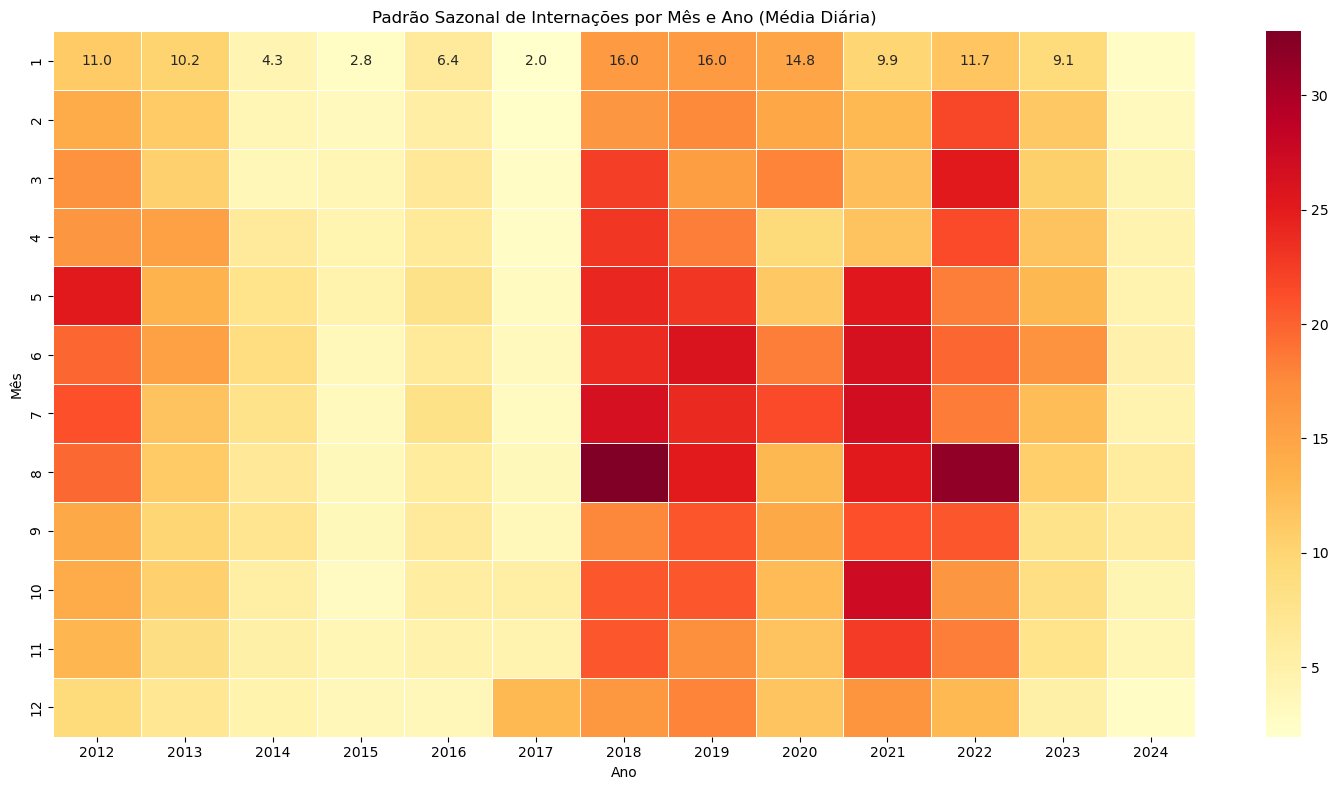

In [22]:
#@title 2. Heatmap de Sazonalidade Anual
# Criando uma tabela pivot para o heatmap
heatmap_data = df_sus_internacoes.pivot_table(values='num_internacoes',
                                             index='mes',
                                             columns='ano',
                                             aggfunc='mean')

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=.5)
plt.title('Padrão Sazonal de Internações por Mês e Ano (Média Diária)')
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.tight_layout()
plt.show()

In [23]:
#@title 3. Gráfico de Médias Mensais
# Preparando os dados
mensal = df_sus_internacoes.groupby(['ano', 'mes'])['num_internacoes'].mean().reset_index()
mensal['mes_ano'] = mensal['mes'].astype(str) + '-' + mensal['ano'].astype(str)

fig = px.line(mensal, x='mes', y='num_internacoes', color='ano',
              title='Média Mensal de Internações por Ano',
              labels={'num_internacoes': 'Média de Internações', 'mes': 'Mês'},
              template='plotly_white',
              hover_data=['mes_ano'])

# Adicionando marcadores e melhorando a legenda
fig.update_traces(mode='lines+markers', marker_size=8)
fig.update_layout(legend_title_text='Ano',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()

In [24]:
#@title 4. Boxplot  por Mês
fig = px.box(df_sus_internacoes, x='mes', y='num_internacoes',
             color='mes',
             title='Distribuição Mensal das Internações (2012-2024)',
             labels={'num_internacoes': 'Número de Internações', 'mes': 'Mês'},
             template='plotly_white')

# Pontos para outliers
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)
fig.update_layout(showlegend=False)

fig.show()

In [25]:
#@title 5. Análise por Dia da Semana
dia_semana = df_sus_internacoes.groupby('dia_da_semana')['num_internacoes'].mean().reset_index()
dia_semana['dia_da_semana'] = pd.Categorical(dia_semana['dia_da_semana'],
                                            categories=['Monday', 'Tuesday', 'Wednesday',
                                                       'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                            ordered=True)
dia_semana = dia_semana.sort_values('dia_da_semana')

fig = px.bar(dia_semana, x='dia_da_semana', y='num_internacoes',
             title='Média de Internações por Dia da Semana',
             labels={'num_internacoes': 'Média de Internações', 'dia_da_semana': 'Dia da Semana'},
             text='num_internacoes',
             template='plotly_white')

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
#@title 6. Comparação Anual com Small Multiples
# Criando uma coluna de mês-ano para facilitar
df_sus_internacoes['mes_ano'] = df_sus_internacoes['data_formatada'].dt.to_period('M').astype(str)

# Agrupando por mês-ano
mensal_anual = df_sus_internacoes.groupby(['ano', 'mes', 'mes_ano'])['num_internacoes'].mean().reset_index()

# Criando small multiples
fig = px.line(mensal_anual, x='mes', y='num_internacoes', facet_col='ano', facet_col_wrap=3,
              title='Comparação Anual das Médias Mensais',
              labels={'num_internacoes': 'Média de Internações', 'mes': 'Mês'},
              template='plotly_white')

fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                      'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'])
fig.show()